# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from factor_analyzer import FactorAnalyzer
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, r2_score

# 2) Loading Dataset

In [2]:
df=pd.read_csv(r"C:\Users\Gobi J\Downloads\Housing.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


# 3) Visualizations

## 3.1) Univariate Analysis

### a)Histogram

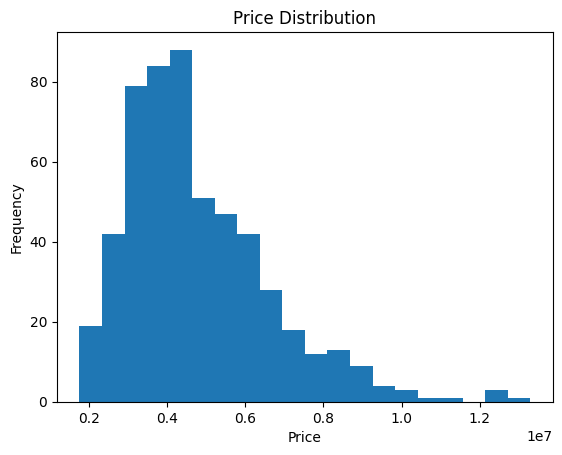

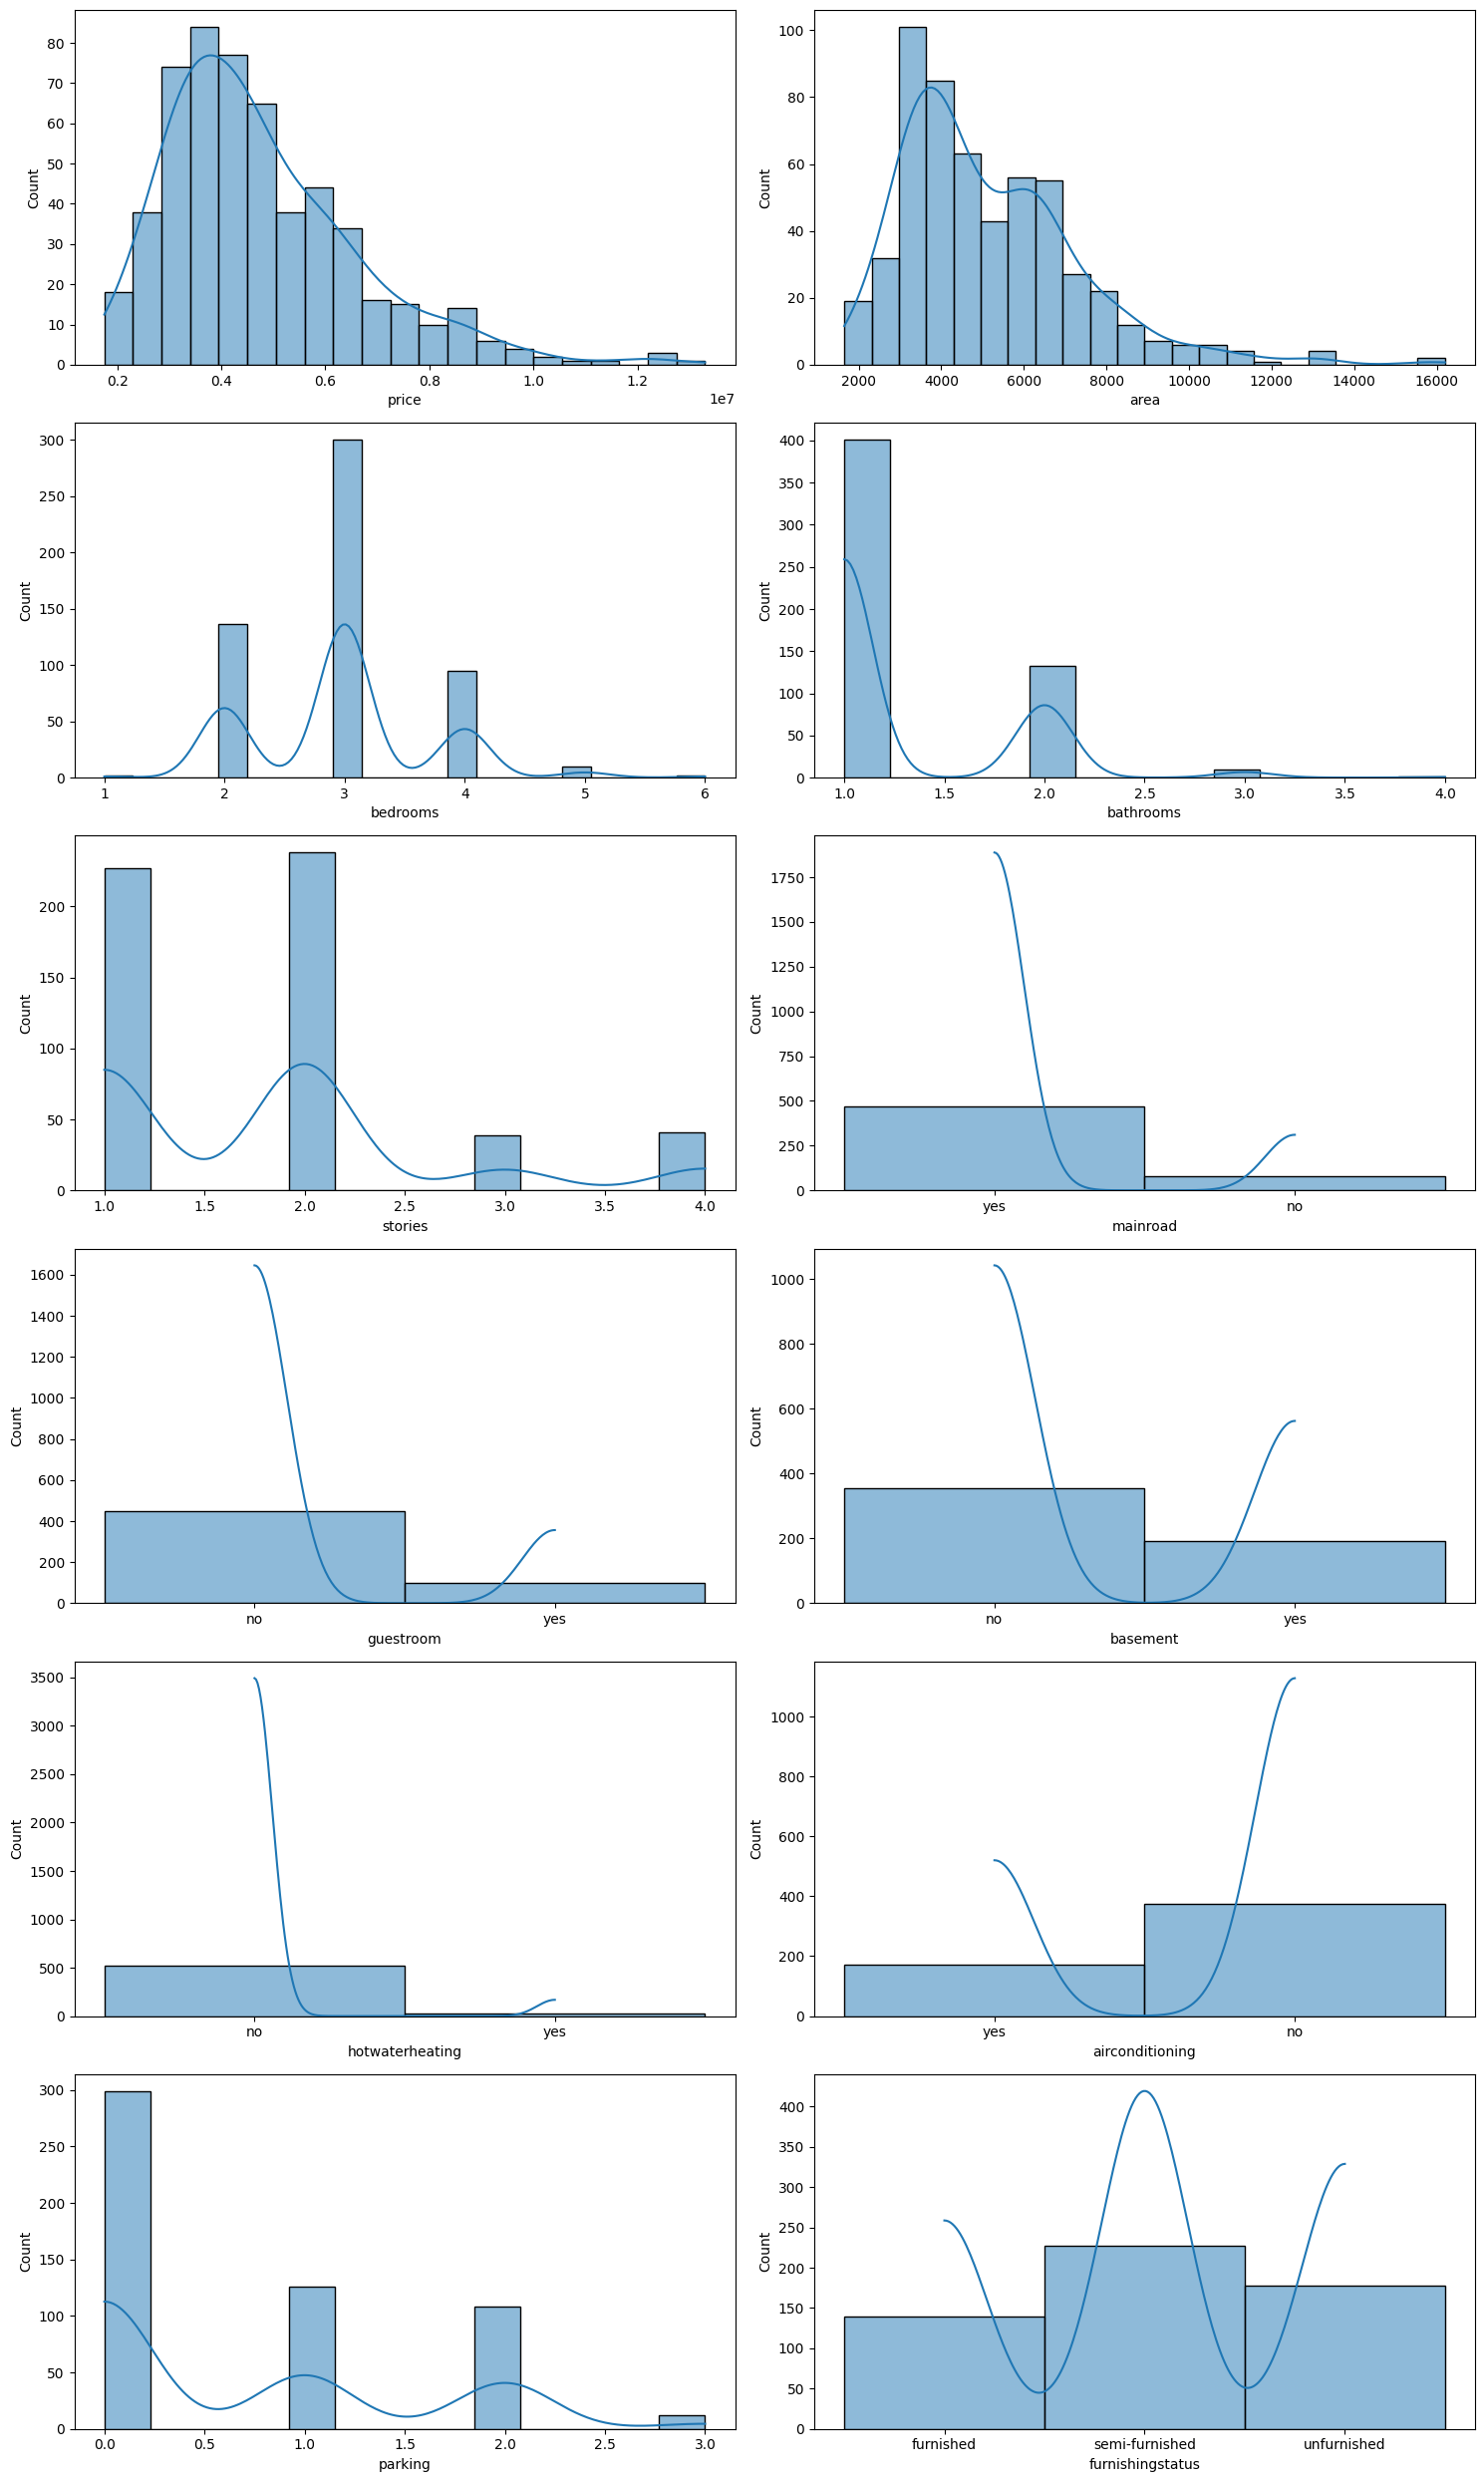

In [4]:
# Plot the distribution of the target variable (Price) using a histogram
plt.hist(df['price'], bins=20)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Creating histograms for all continuous variables
plt.figure(figsize=(15, 25))
plt.subplot(621)
sns.histplot(df['price'], kde=True)
plt.subplot(622)
sns.histplot(df['area'], kde=True)
plt.subplot(623)
sns.histplot(df['bedrooms'], kde=True)
plt.subplot(624)
sns.histplot(df['bathrooms'], kde=True)
plt.subplot(625)
sns.histplot(df['stories'], kde=True)
plt.subplot(626)
sns.histplot(df['mainroad'], kde=True)
plt.subplot(627)
sns.histplot(df['guestroom'], kde=True)
plt.subplot(628)
sns.histplot(df['basement'], kde=True)
plt.subplot(629)
sns.histplot(df['hotwaterheating'], kde=True)
plt.subplot(6,2,10)
sns.histplot(df['airconditioning'], kde=True)
plt.subplot(6,2,11)
sns.histplot(df['parking'], kde=True)
plt.subplot(6,2,12)
sns.histplot(df['furnishingstatus'], kde=True)
plt.tight_layout()
plt.show()

### b) Box Plot 

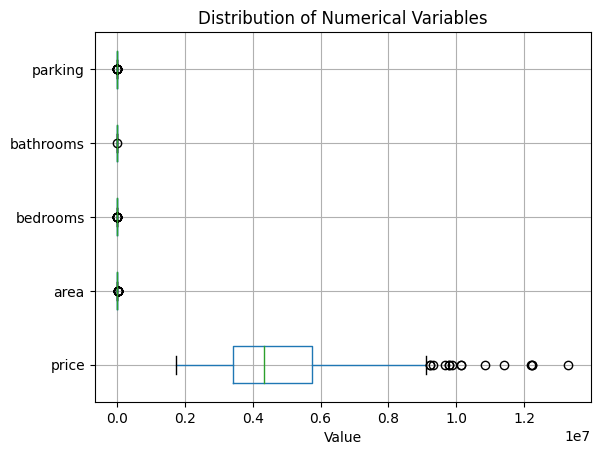

In [5]:
# Plot the distribution of each numerical variable using a boxplot
df.boxplot(column=['price', 'area', 'bedrooms', 'bathrooms', 'parking'], vert=False)
plt.title('Distribution of Numerical Variables')
plt.xlabel('Value')
plt.show()

### c) Bar Chart 

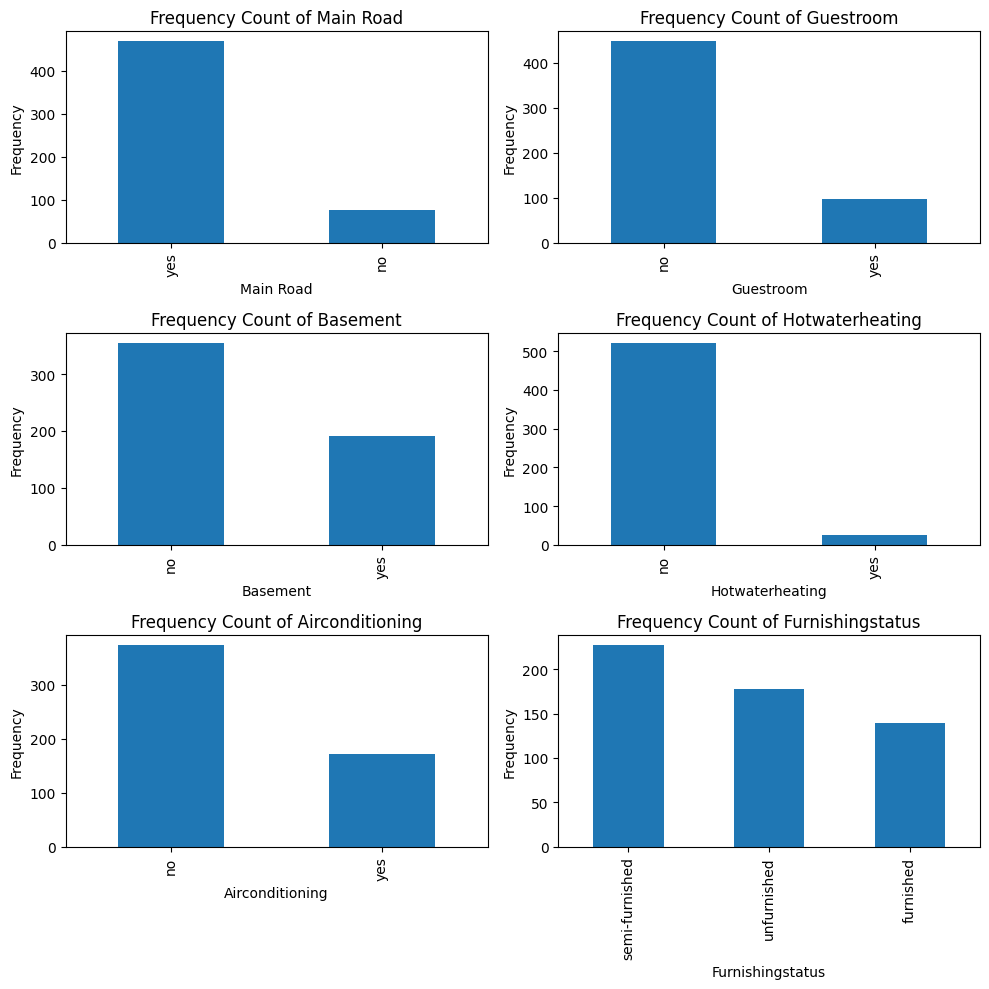

In [6]:
# Plot the frequency count of each categorical variable using a bar chart
plt.figure(figsize=(10, 10))

plt.subplot(321)
df['mainroad'].value_counts().plot(kind='bar')
plt.title('Frequency Count of Main Road')
plt.xlabel('Main Road')
plt.ylabel('Frequency')

plt.subplot(322)
df['guestroom'].value_counts().plot(kind='bar')
plt.title('Frequency Count of Guestroom')
plt.xlabel('Guestroom')
plt.ylabel('Frequency')

plt.subplot(323)
df['basement'].value_counts().plot(kind='bar')
plt.title('Frequency Count of Basement')
plt.xlabel('Basement')
plt.ylabel('Frequency')

plt.subplot(324)
df['hotwaterheating'].value_counts().plot(kind='bar')
plt.title('Frequency Count of Hotwaterheating')
plt.xlabel('Hotwaterheating')
plt.ylabel('Frequency')

plt.subplot(325)
df['airconditioning'].value_counts().plot(kind='bar')
plt.title('Frequency Count of Airconditioning')
plt.xlabel('Airconditioning')
plt.ylabel('Frequency')

plt.subplot(326)
df['furnishingstatus'].value_counts().plot(kind='bar')
plt.title('Frequency Count of Furnishingstatus')
plt.xlabel('Furnishingstatus')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 3.2) Bivariate Analysis

### a) Numerical vs Numerical

#### i) Scatter Plot

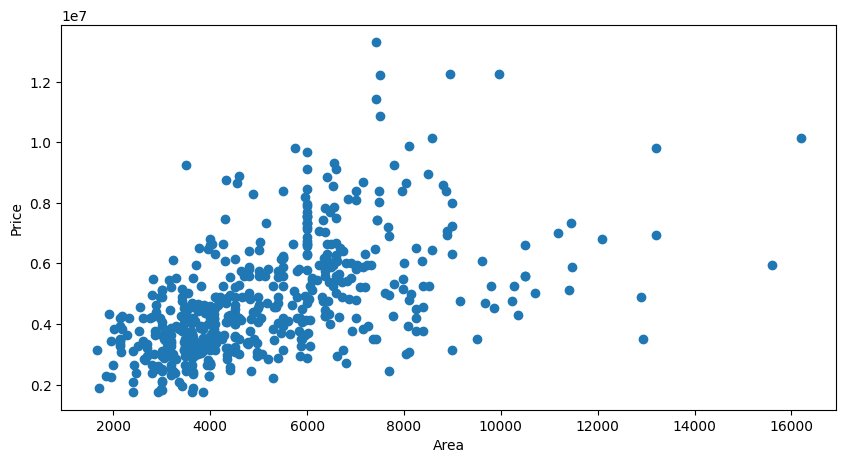

In [7]:
# Create a scatter plot of Price vs. Area
plt.figure(figsize=(10, 5))
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

#### ii) Correlation Coefficient

In [8]:
# Calculate the correlation coefficient between Price and Area
corr = df['price'].corr(df['area'])
print("Correlation coefficient between Price and Area:", corr)

Correlation coefficient between Price and Area: 0.5359973457780797


### b) Categorical vs Categorical

#### i) Cross - Tabulation Table

In [9]:
# Create a cross-tabulation table of Hot Waterheating vs. Air Conditioning
ctab = pd.crosstab(df['hotwaterheating'], df['airconditioning'])
ctab

airconditioning,no,yes
hotwaterheating,,
no,349,171
yes,24,1


#### ii) Stacked Bar Chart

<Figure size 1000x500 with 0 Axes>

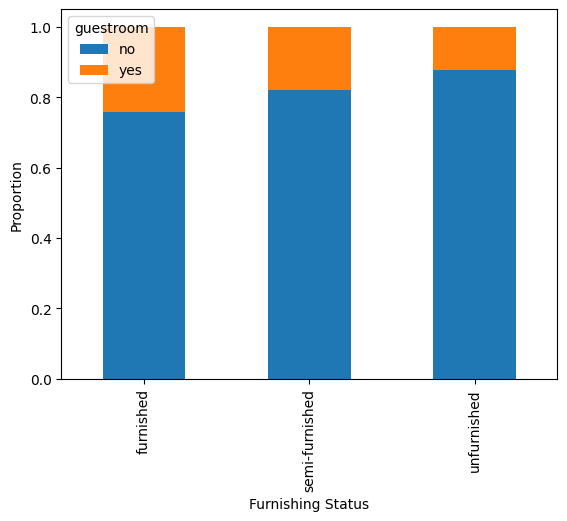

In [10]:
# Create a stacked bar chart of Furnishing Status vs. Air Conditioning
plt.figure(figsize=(10, 5))
ctab = pd.crosstab(df['furnishingstatus'], df['guestroom'], normalize='index')
ctab.plot(kind='bar', stacked=True)
plt.xlabel('Furnishing Status')
plt.ylabel('Proportion')
plt.show()

### c) Numerical vs Categorical

#### i) Statistical Test: t-test

In [11]:
furnished = df[df["furnishingstatus"] == "furnished"]["price"]
unfurnished = df[df["furnishingstatus"] == "unfurnished"]["price"]
t_stat, p_value = ttest_ind(furnished, unfurnished)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 6.884687359310765
p-value: 3.1284706229043413e-11


### d) Categorical vs Numerical

#### i) Scatter Plot

<AxesSubplot: xlabel='mainroad', ylabel='price'>

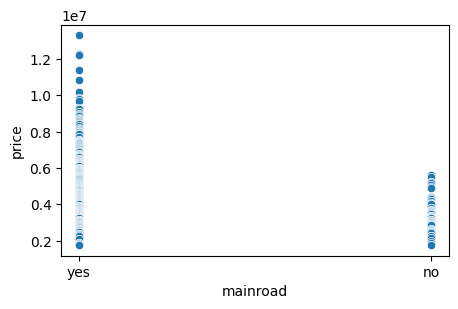

In [12]:
plt.figure(figsize=(5, 3))
# Scatter plot of Price and Mainroad
sns.scatterplot(x='mainroad', y='price', data=df)

#### ii)Box Plot

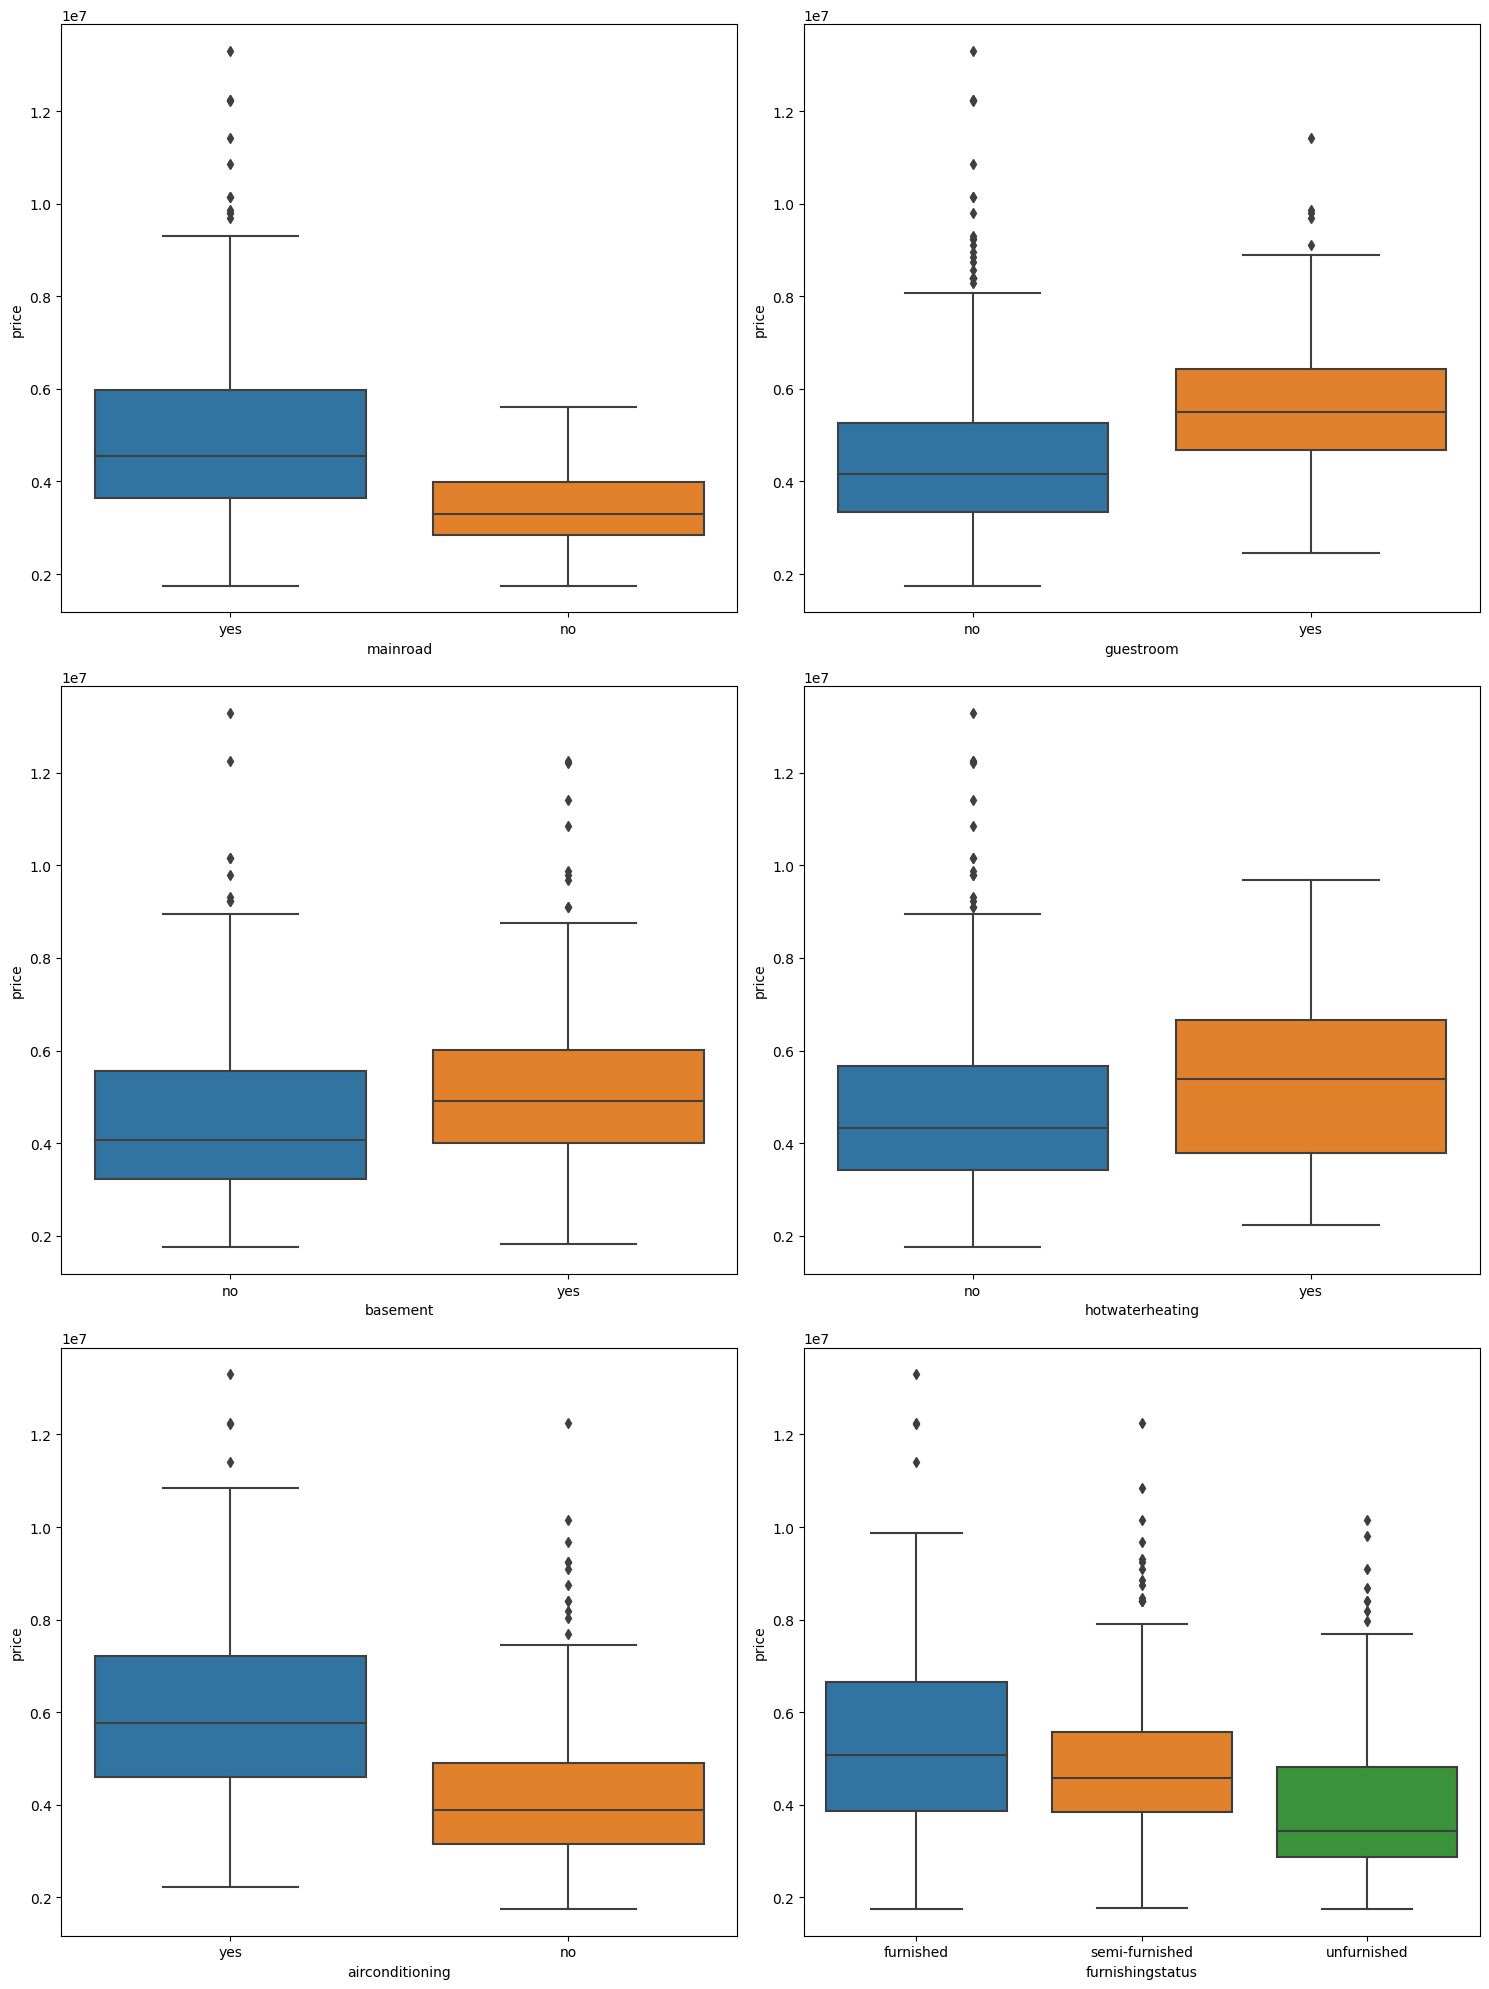

In [13]:
# Plot the distribution of each categorical variable with price using a boxplot
plt.figure(figsize=(15, 20))
plt.subplot(321)
sns.boxplot(x='mainroad', y='price', data=df)
plt.subplot(322)
sns.boxplot(x='guestroom', y='price', data=df)
plt.subplot(323)
sns.boxplot(x='basement', y='price', data=df)
plt.subplot(324)
sns.boxplot(x='hotwaterheating', y='price', data=df)
plt.subplot(325)
sns.boxplot(x='airconditioning', y='price', data=df)
plt.subplot(326)
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.tight_layout()
plt.show()


#### iii) Bar Plot

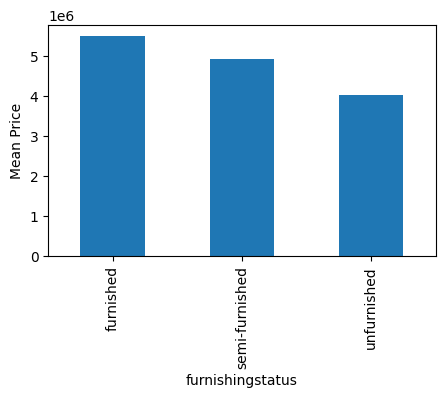

In [14]:
# Calculate the mean price for each furnishing status
mean_prices = df.groupby('furnishingstatus')['price'].mean()
# Create a bar plot of mean price vs. Furnishing Status
plt.figure(figsize=(5, 3))
mean_prices.plot(kind='bar')
plt.ylabel('Mean Price')
plt.show()

## 3.3) Multivariate Analysis

### a)Heatmap - Correlation Matrix

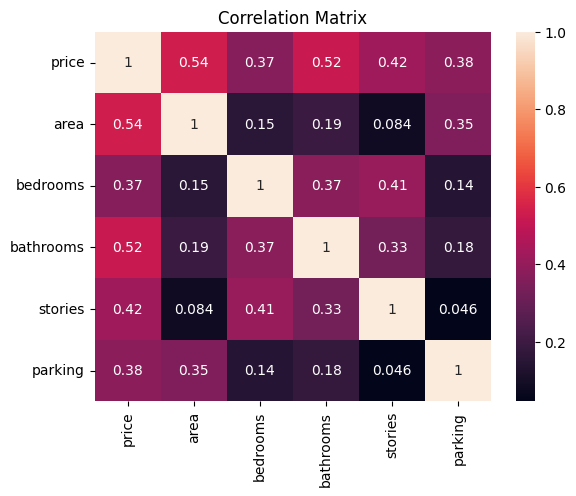

In [15]:
# Heatmap of all numeric variables
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Matrix')
plt.show()

### b) Scatter Plot

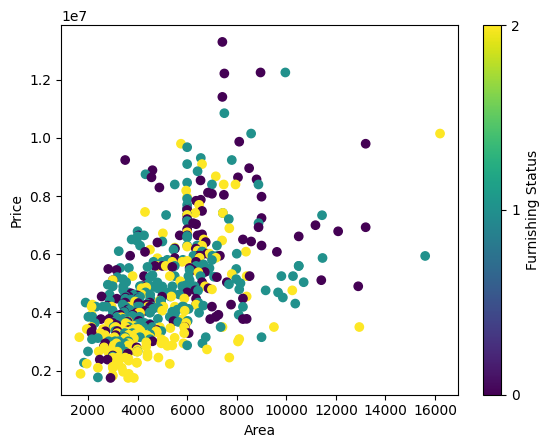

In [16]:
# Create a scatter plot of Price vs. Area with color coded by Furnishing Status
plt.scatter(df['area'], df['price'], c=df['furnishingstatus'].map({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}))
plt.xlabel('Area')
plt.ylabel('Price')
plt.colorbar(ticks=[0, 1, 2], label='Furnishing Status')
plt.show()

### c) Scatter Plot Matrix

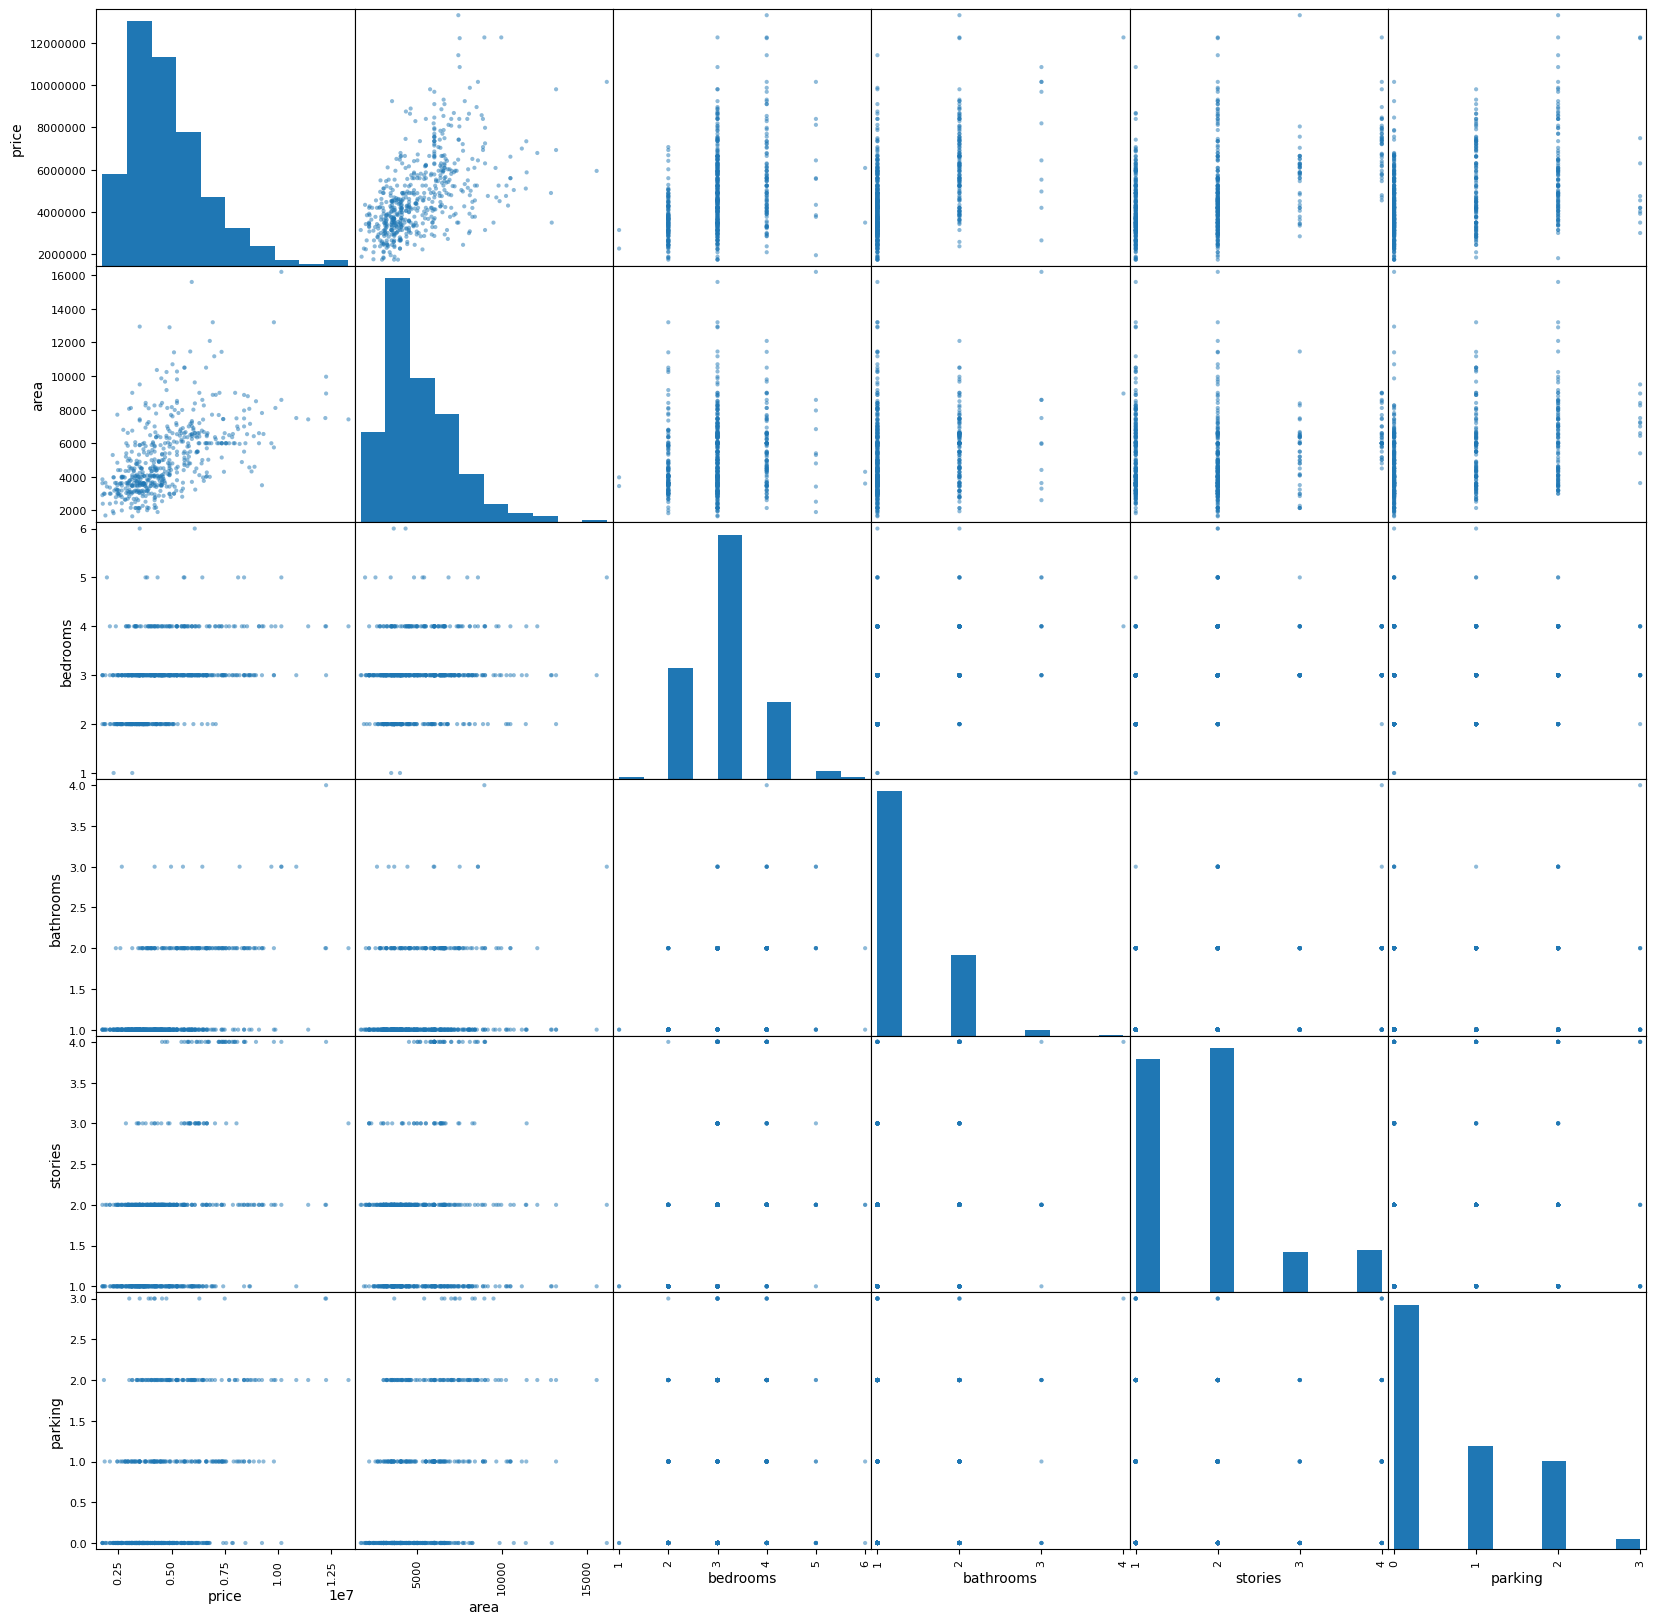

In [4]:
# Select the numerical variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Seaborn Library
# sns.pairplot(df[num_vars])

# Pandas Library
pd.plotting.scatter_matrix(df[num_vars], figsize=(20,20), alpha=0.5, diagonal='hist')
plt.show()

### d) Multiple Regression Analysis

In [5]:
# Define the predictors variables (Only Numerical)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
# Define the response variable 
y = df['price']
# Add a constant term to the predictors
X = sm.add_constant(X)
# Fit the multiple regression model
model = sm.OLS(y, X).fit()
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     138.1
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           4.37e-94
Time:                        21:24:33   Log-Likelihood:                -8418.8
No. Observations:                 545   AIC:                         1.685e+04
Df Residuals:                     539   BIC:                         1.688e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.457e+05   2.47e+05     -0.591      0.5

### e) Factor Analysis

In [6]:
# Select the predictor variables
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
# Create a factor analysis object
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
# Fit the factor analysis model
fa.fit(X)
# Print the factor loadings
print(fa.loadings_)

[[0.12752397 0.54821528]
 [0.65472779 0.13557001]
 [0.52382992 0.22539425]
 [0.62317572 0.00214414]
 [0.07529486 0.62628941]]


### f) Cluster Analysis

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


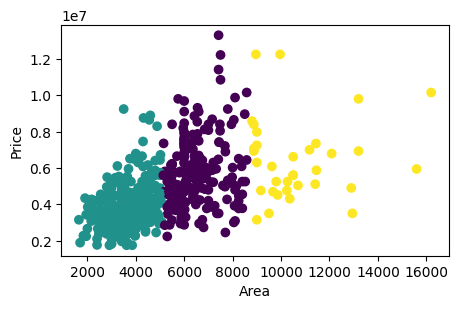

In [20]:
# Select the predictor variables
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=3,n_init=10)
# Fit the KMeans model
kmeans.fit(X)
# Get the cluster labels
labels = kmeans.labels_
# Add the cluster labels to the housing dataset
df['cluster'] = labels
# Plot the clusters
plt.figure(figsize=(5,3))
plt.scatter(df['area'], df['price'], c=df['cluster'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# 4) Descriptive Statistics

## a) Describe

In [7]:
print('Descriptive statistics for Numerical Variables:')
df.describe()

Descriptive statistics for Numerical Variables:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [22]:
print('Descriptive statistics for Categorical Variables:\n')
print(df['mainroad'].value_counts(),'\n')
print(df['guestroom'].value_counts(),'\n')
print(df['basement'].value_counts(),'\n')
print(df['hotwaterheating'].value_counts(),'\n')
print(df['airconditioning'].value_counts(),'\n')
print(df['furnishingstatus'].value_counts())

Descriptive statistics for Categorical Variables:

yes    468
no      77
Name: mainroad, dtype: int64 

no     448
yes     97
Name: guestroom, dtype: int64 

no     354
yes    191
Name: basement, dtype: int64 

no     520
yes     25
Name: hotwaterheating, dtype: int64 

no     373
yes    172
Name: airconditioning, dtype: int64 

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


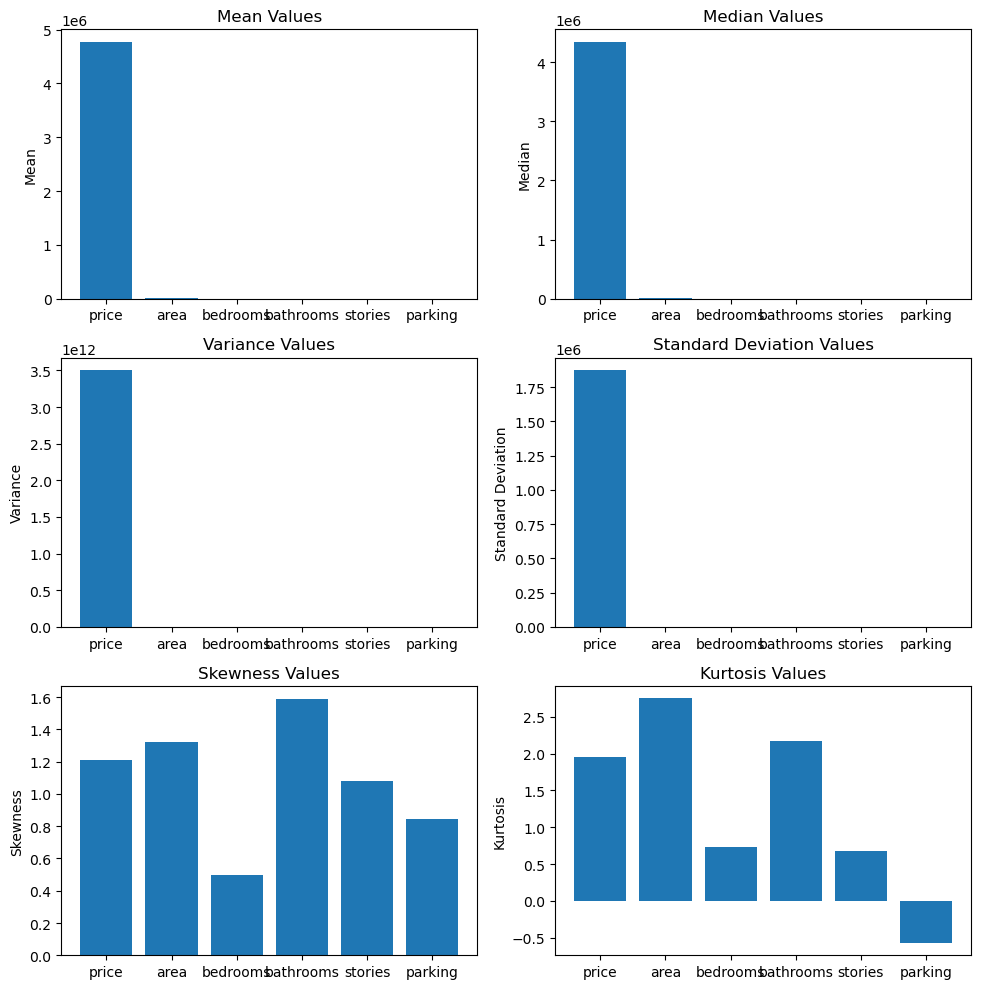

In [8]:
# Calculate variance, standard deviation, skewness, and kurtosis for each numerical variable
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
variance_values = df.var(numeric_only=True)
std_values = df.std(numeric_only=True)
skewness_values = df.skew(numeric_only=True)
kurtosis_values = df.kurtosis(numeric_only=True)

# Create subplots for each descriptive statistic
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Plot mean
axs[0, 0].bar(mean_values.index, mean_values.values)
axs[0, 0].set_ylabel('Mean')
axs[0, 0].set_title('Mean Values')

# Plot median
axs[0, 1].bar(median_values.index, median_values.values)
axs[0, 1].set_ylabel('Median')
axs[0, 1].set_title('Median Values')

# Plot variance
axs[1, 0].bar(variance_values.index, variance_values.values)
axs[1, 0].set_ylabel('Variance')
axs[1, 0].set_title('Variance Values')

# Plot standard deviation
axs[1, 1].bar(std_values.index, std_values.values)
axs[1, 1].set_ylabel('Standard Deviation')
axs[1, 1].set_title('Standard Deviation Values')

# Plot skewness
axs[2, 0].bar(skewness_values.index, skewness_values.values)
axs[2, 0].set_ylabel('Skewness')
axs[2, 0].set_title('Skewness Values')

# Plot kurtosis
axs[2, 1].bar(kurtosis_values.index, kurtosis_values.values)
axs[2, 1].set_ylabel('Kurtosis')
axs[2, 1].set_title('Kurtosis Values')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


## b) Mean

<AxesSubplot: xlabel='area'>

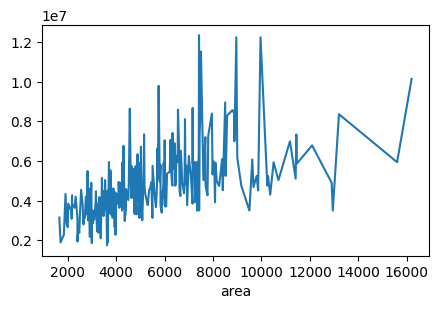

In [24]:
plt.figure(figsize=(5,3))
a = df.groupby('area')['price'].mean()
a.plot()

## c) Median

<AxesSubplot: xlabel='parking'>

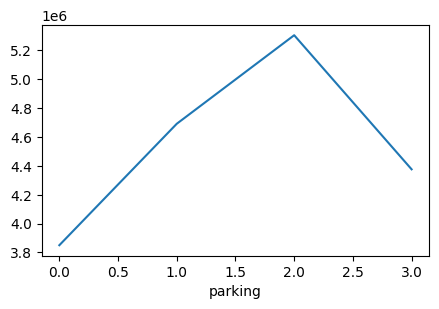

In [25]:
plt.figure(figsize=(5,3))
b = df.groupby('parking')['price'].median()
b.plot()

## d) Mode

In [26]:
df.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,cluster
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,semi-furnished,1.0
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## e) Variance

In [27]:
df.var(numeric_only=True)

price        3.498544e+12
area         4.709512e+06
bedrooms     5.447383e-01
bathrooms    2.524757e-01
stories      7.525432e-01
parking      7.423300e-01
cluster      3.357528e-01
dtype: float64

## f) Skew

In [28]:
df.skew(numeric_only=True)

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
cluster      0.149248
dtype: float64

## g) Kurtosis

In [29]:
df.kurtosis(numeric_only=True)

price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
cluster     -0.589024
dtype: float64

# 5) Handle Missing Values

In [30]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
cluster             0
dtype: int64

# 6) Outliers

## a) Outlier Analysis

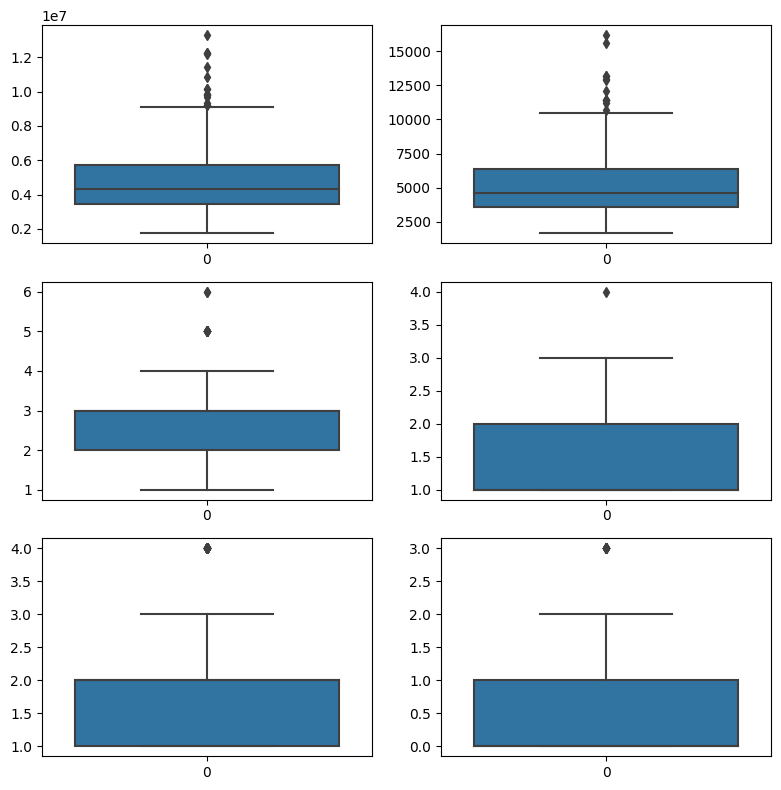

In [31]:
# Outlier analysis
plt.figure(figsize=(8, 8))
plt.subplot(321)
sns.boxplot(df['price'])
plt.subplot(322)
sns.boxplot(df['area'])
plt.subplot(323)
sns.boxplot(df['bedrooms'])
plt.subplot(324)
sns.boxplot(df['bathrooms'])
plt.subplot(325)
sns.boxplot(df['stories'])
plt.subplot(326)
sns.boxplot(df['parking'])
plt.tight_layout()
plt.show()

## b) Handling Outliers

In [9]:
# We can replace the outliers with the 95th percentile value

# # Replace the outliers in Price
q = df['price'].quantile(0.95)
df = df[df['price'] < q]

# Replace the outliers in Area
q = df['area'].quantile(0.95)
df = df[df['area'] < q]

# Replace the outliers in Bedrooms
q = df['bedrooms'].quantile(0.95)
df = df[df['bedrooms'] < q]

# Replace the outliers in Bathrooms
q = df['bathrooms'].quantile(0.95)
df = df[df['bathrooms'] < q]


In [33]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,cluster
38,7962500,6000,3,1,4,yes,yes,no,no,yes,2,unfurnished,0
40,7875000,6550,3,1,2,yes,no,yes,no,yes,0,furnished,0
47,7490000,6600,3,1,4,yes,no,no,no,yes,3,furnished,0
51,7420000,6325,3,1,4,yes,no,no,no,yes,1,unfurnished,0
55,7350000,6000,3,1,2,yes,no,no,no,yes,1,unfurnished,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished,1
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished,1
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished,1
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished,1


# 7) Encoding

In [10]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

## a) Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])


In [12]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
38,7962500,6000,3,1,4,1,1,0,0,1,2,2
40,7875000,6550,3,1,2,1,0,1,0,1,0,0
47,7490000,6600,3,1,4,1,0,0,0,1,3,0
51,7420000,6325,3,1,4,1,0,0,0,1,1,2
55,7350000,6000,3,1,2,1,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


In [13]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int32
guestroom           int32
basement            int32
hotwaterheating     int32
airconditioning     int32
parking             int64
furnishingstatus    int32
dtype: object

## b) One Hot Encoding

In [14]:
df = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus'])

In [15]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_0,mainroad_1,guestroom_0,guestroom_1,basement_0,basement_1,hotwaterheating_0,hotwaterheating_1,airconditioning_0,airconditioning_1,furnishingstatus_0,furnishingstatus_1,furnishingstatus_2
38,7962500,6000,3,1,4,2,0,1,0,1,1,0,1,0,0,1,0,0,1
40,7875000,6550,3,1,2,0,0,1,1,0,0,1,1,0,0,1,1,0,0
47,7490000,6600,3,1,4,3,0,1,1,0,1,0,1,0,0,1,1,0,0
51,7420000,6325,3,1,4,1,0,1,1,0,1,0,1,0,0,1,0,0,1
55,7350000,6000,3,1,2,1,0,1,1,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,0,1,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [16]:
df.dtypes

price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
parking               int64
mainroad_0            uint8
mainroad_1            uint8
guestroom_0           uint8
guestroom_1           uint8
basement_0            uint8
basement_1            uint8
hotwaterheating_0     uint8
hotwaterheating_1     uint8
airconditioning_0     uint8
airconditioning_1     uint8
furnishingstatus_0    uint8
furnishingstatus_1    uint8
furnishingstatus_2    uint8
dtype: object

# 8) Split the Dataset

## a) Independent Variables

In [17]:
X = df.iloc[:, 1:]
# X = df.drop('price', axis=1)
X

,area,bedrooms,bathrooms,stories,parking,mainroad_0,mainroad_1,guestroom_0,guestroom_1,basement_0,basement_1,hotwaterheating_0,hotwaterheating_1,airconditioning_0,airconditioning_1,furnishingstatus_0,furnishingstatus_1,furnishingstatus_2
38,6000,3,1,4,2,0,1,0,1,1,0,1,0,0,1,0,0,1
40,6550,3,1,2,0,0,1,1,0,0,1,1,0,0,1,1,0,0
47,6600,3,1,4,3,0,1,1,0,1,0,1,0,0,1,1,0,0
51,6325,3,1,4,1,0,1,1,0,1,0,1,0,0,1,0,0,1
55,6000,3,1,2,1,0,1,1,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0,1,1,0,0,1,1,0,1,0,0,0,1
541,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
543,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


## b) Dependent Variable

In [18]:
y = df.iloc[:, 0]
# y = df['price']
y

38     7962500
40     7875000
47     7490000
51     7420000
55     7350000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 331, dtype: int64

# 9) Scale the independent variables

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X

array([[ 0.92723162,  0.76463406,  0.        , ..., -0.51787956,
        -0.8093207 ,  1.24344435],
       [ 1.27439403,  0.76463406,  0.        , ...,  1.93095091,
        -0.8093207 , -0.80421774],
       [ 1.30595425,  0.76463406,  0.        , ...,  1.93095091,
        -0.8093207 , -0.80421774],
       ...,
       [-0.57503482, -1.24404748,  0.        , ..., -0.51787956,
        -0.8093207 ,  1.24344435],
       [-1.02318994,  0.76463406,  0.        , ...,  1.93095091,
        -0.8093207 , -0.80421774],
       [-0.42985781,  0.76463406,  0.        , ..., -0.51787956,
        -0.8093207 ,  1.24344435]])

# 10) Split train and test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_test

array([[ 1.19233746,  0.76463406,  0.        , ...,  1.93095091,
        -0.8093207 , -0.80421774],
       [-0.65077935, -1.24404748,  0.        , ..., -0.51787956,
        -0.8093207 ,  1.24344435],
       [-0.23418446,  0.76463406,  0.        , ..., -0.51787956,
        -0.8093207 ,  1.24344435],
       ...,
       [ 1.558436  ,  0.76463406,  0.        , ..., -0.51787956,
        -0.8093207 ,  1.24344435],
       [-0.37936146, -1.24404748,  0.        , ..., -0.51787956,
        -0.8093207 ,  1.24344435],
       [ 0.89440899,  0.76463406,  0.        , ..., -0.51787956,
         1.23560413, -0.80421774]])

In [23]:
y_train

415    3395000
223    4760000
473    3003000
97     6300000
115    6020000
        ...   
373    3640000
210    4900000
260    4473000
476    2940000
256    4480000
Name: price, Length: 264, dtype: int64

In [24]:
y_test

118    5950000
518    2450000
215    4830000
414    3423000
192    5040000
        ...   
527    2275000
51     7420000
219    4795000
439    3255000
198    4935000
Name: price, Length: 67, dtype: int64

# 11 to 14) Building, Training, Testing and Measuring the Performance of the Model using Metrics

## a) Linear Regression

In [25]:
# create an instance of the LinearRegression class
linear = LinearRegression()
# fit the model to the training data
linear.fit(X_train, y_train)

LinearRegression()

In [26]:
# make predictions on the test data
y_pred = linear.predict(X_test)
y_pred

array([4924373.54620346, 3035021.71057408, 4027354.39885869,
       2786412.66008161, 4790876.73393975, 3636177.3251477 ,
       3690122.22799778, 3031806.28067985, 2858135.21215414,
       4071728.61055368, 5567529.82423456, 5621873.62314832,
       3935878.9088183 , 4420776.55726554, 3450960.71534353,
       4841158.24073351, 3486651.60476655, 3948459.90550914,
       3961586.33354258, 4558321.69890075, 3510685.70749691,
       3914108.02960202, 3463247.47616298, 2691236.95495354,
       5174669.4837866 , 4339799.18030882, 2688857.56232534,
       2657925.45815872, 3098351.24667164, 2109461.44681859,
       3136396.72235707, 2335620.59100104, 4903993.93393148,
       3545096.12218076, 3022196.85220147, 3012679.28168866,
       3452866.91790598, 2801233.68276323, 4518385.53343424,
       4729322.23555944, 4733057.65905031, 5856823.56592053,
       2797330.23829678, 4193676.68409862, 4412558.31251177,
       3292745.3872102 , 3949592.86897506, 6412188.32127376,
       4024692.77885155,

In [27]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)

Mean Absolute Error (MAE):  630169.7161871829
Mean Squared Error (MSE):  615761765764.443
Root Mean Squared Error (RMSE):  784704.8908758266
R-squared (R2) score:  0.5887205885294093


In [28]:
# Perform cross-validation with 5 folds
scores = cross_val_score(linear, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the mean squared error scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 1123307018871.5742
Standard Deviation MSE: 981023836757.4371


In [29]:
import pickle
pickle.dump(linear,open("house.pkl","wb"))

## b) Lasso Regression

In [64]:
# create Lasso regression object
lasso = Lasso(alpha=0.1)
# fit the Lasso model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [65]:
# predict on the test set
y_pred = lasso.predict(X_test)
y_pred

array([4922892.38636001, 3035393.30321173, 4029289.89891393,
       2787400.27967302, 4789974.58124817, 3634180.67260476,
       3686995.41730498, 3032596.16260211, 2861829.09704955,
       4071811.35026144, 5566941.37017716, 5619454.76861207,
       3937442.814516  , 4417382.96380347, 3451823.85661692,
       4837707.44977706, 3487807.37769534, 3949676.98712199,
       3964237.69916775, 4560292.58606264, 3512432.73679551,
       3916551.95528458, 3462507.24452083, 2691444.2234639 ,
       5193146.28095206, 4342950.84295195, 2689045.32205867,
       2657859.6037907 , 3099015.56031939, 2108936.53231135,
       3135925.93935298, 2335030.34846145, 4906907.34087397,
       3546740.98279483, 3022522.67443805, 3012927.06881714,
       3448843.460229  , 2800341.7452291 , 4520069.98205188,
       4729745.84918803, 4736451.3186755 , 5855252.66298342,
       2799850.19406972, 4193908.86817257, 4415660.94379492,
       3294609.35021916, 3946673.85312828, 6415190.78173218,
       4021623.74221298,

In [66]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)

Mean Absolute Error (MAE):  629505.8485995763
Mean Squared Error (MSE):  614320247943.6743
Root Mean Squared Error (RMSE):  783785.8431635994
R-squared (R2) score:  0.589683406674206


In [67]:
# Perform cross-validation with 5 folds
scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the mean squared error scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 1108363255081.2104
Standard Deviation MSE: 910732658437.6577


## c) Ridge Regression

In [68]:
# Initialize the Ridge Regression Model
ridge = Ridge(alpha=1.0)
# Train the Model on the Training Data
ridge.fit(X_train, y_train)

Ridge()

In [69]:
# Make Predictions on Test Data
y_pred= ridge.predict(X_test)
y_pred

array([4925170.93550685, 3038443.09305463, 4024259.9144225 ,
       2788176.69549165, 4791483.31515465, 3638884.00606275,
       3691260.69018075, 3034873.9955753 , 2857695.85794098,
       4071925.69495372, 5564708.49285988, 5623414.07225207,
       3934670.76323953, 4421937.29088652, 3451472.57895576,
       4841851.81126475, 3486879.40777098, 3946374.35105565,
       3961975.29257708, 4557998.20129229, 3509122.604443  ,
       3914578.48425218, 3464422.4514881 , 2693758.48531774,
       5163254.57415799, 4335409.20473742, 2691398.03006339,
       2660712.11175687, 3098172.38138745, 2111924.93133668,
       3140264.56747314, 2339339.88408622, 4902006.33238733,
       3546966.37706037, 3024570.74788844, 3015128.92687105,
       3455291.39511706, 2804208.95717473, 4517506.47209363,
       4727546.26614748, 4729235.84692897, 5854260.7761289 ,
       2796805.48205954, 4191819.04417118, 4409834.82923996,
       3292618.97706454, 3951722.01649116, 6405933.39839373,
       4026298.19921895,

In [70]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)

Mean Absolute Error (MAE):  630057.3973522037
Mean Squared Error (MSE):  616516307425.1625
Root Mean Squared Error (RMSE):  785185.5242075992
R-squared (R2) score:  0.5882166152926731


In [71]:
# Perform cross-validation with 5 folds
scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the mean squared error scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 1109881008671.6138
Standard Deviation MSE: 914899171515.825


In [72]:
# Hyper Parameter Tuning
param_grid = {'alpha': np.logspace(-3, 3, 13)}
grid_search = GridSearchCV(Ridge(), param_grid, cv=10)
grid_search.fit(X_train, y_train)
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best score:", grid_search.best_score_)

Best alpha: 31.622776601683793
Best score: 0.5096174832162461


In [73]:
# Perform cross-validation with 5 folds
scores = cross_val_score(grid_search, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the mean squared error scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 1263852555058.183
Standard Deviation MSE: 1385190261284.811


## d) Decision Tree Regression

In [74]:
# Initialize the DecisionTreeRegressor model
dt = DecisionTreeRegressor(random_state=42)
# Train the model using the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [75]:
# Test the model using the testing set
y_pred = dt.predict(X_test)
y_pred

array([7875000., 3500000., 4200000., 3290000., 5950000., 2660000.,
       3675000., 2940000., 4620000., 3500000., 3850000., 4550000.,
       2450000., 2940000., 3500000., 4025000., 2432500., 3150000.,
       3010000., 4007500., 3500000., 4060000., 5110000., 2345000.,
       3500000., 3885000., 1750000., 3500000., 4900000., 2450000.,
       3675000., 2604000., 4007500., 4060000., 4270000., 4270000.,
       3465000., 2870000., 4620000., 3010000., 4200000., 5600000.,
       4270000., 3360000., 4165000., 3395000., 6629000., 4193000.,
       3500000., 2345000., 2380000., 3675000., 5145000., 6020000.,
       5040000., 3220000., 5600000., 4690000., 3675000., 4270000.,
       2730000., 2240000., 1767150., 5600000., 5880000., 2275000.,
       4620000.])

In [76]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)

Mean Absolute Error (MAE):  916796.2686567164
Mean Squared Error (MSE):  1413937602574.627
Root Mean Squared Error (RMSE):  1189091.08253936
R-squared (R2) score:  0.055603226158264296


In [77]:
# Perform cross-validation with 5 folds
scores = cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the mean squared error scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 1631640063991.1804
Standard Deviation MSE: 888421515155.6624


## e) Random Forest Regression

In [78]:
# Initialize the Random Forest Model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
# Train the Model on the Training Data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [79]:
# Make Predictions on Test Data
y_pred = rf.predict(X_test)
y_pred

array([5956965.        , 3000515.        , 3845339.16666667,
       3213087.5       , 5312860.        , 3386695.08333333,
       4132117.5       , 3339560.        , 3395385.        ,
       3556297.5       , 4813025.        , 4894995.        ,
       3524176.25      , 4544540.        , 2995921.25      ,
       4973990.        , 2619105.        , 3953110.        ,
       3952340.        , 4299732.5       , 3627452.5       ,
       4368175.        , 3666460.        , 2287600.        ,
       4189955.        , 4354367.5       , 2154425.        ,
       2676380.        , 4290105.75      , 2589755.        ,
       3130015.        , 2606500.75      , 4266080.        ,
       3816995.        , 3536610.        , 3585960.        ,
       3809400.        , 2633295.        , 3954825.        ,
       4289950.        , 4584387.5       , 5687692.5       ,
       3341520.        , 3721725.        , 4268075.        ,
       3543662.5       , 5340877.5       , 5788387.5       ,
       4198285.        ,

In [80]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)

Mean Absolute Error (MAE):  616941.9067164179
Mean Squared Error (MSE):  702928668126.5049
Root Mean Squared Error (RMSE):  838408.4136782651
R-squared (R2) score:  0.5305000975921764


In [81]:
# Perform cross-validation with 5 folds
scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the mean squared error scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 1320748022680.103
Standard Deviation MSE: 1171218163571.8687


In [82]:
# Define a dictionary of hyperparameters to test
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
}
# Instantiate the GridSearchCV object with the Random Forest model and parameter grid
rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5)
# Fit the GridSearchCV object to the training data
rf_grid_search.fit(X_train, y_train)
# Print the best hyperparameters and score
print(f"Best hyperparameters: {rf_grid_search.best_params_}")
print(f"Best R2 score: {rf_grid_search.best_score_:.4f}")

Best hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best R2 score: 0.5055


In [83]:
# Perform cross-validation with 5 folds
scores = cross_val_score(rf_grid_search, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the mean squared error scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 1334315268227.6125
Standard Deviation MSE: 1221507139626.125


## f) XGBoost Regression

In [84]:
# Initialize the XGBoost Regression Model
xgbr = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
# Train the Model on the Training Data
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [85]:
# Make Predictions on Test Data
y_pred = xgbr.predict(X_test)
y_pred

array([6171796.5, 3386211. , 4950941. , 3217958. , 6496929. , 3141686.8,
       3963283.8, 4142755.2, 2906866.2, 3657216. , 4785448. , 4451909.5,
       3988300.5, 5063199. , 3320845.5, 4843969.5, 2716362.8, 3943792.5,
       3967027. , 4953102.5, 3472768.2, 4232428.5, 3920829.8, 2291828. ,
       4230812.5, 4269927.5, 2296048. , 3501581. , 4928437. , 2635536.8,
       3570668.5, 2528479. , 4076559. , 4020143.8, 3147907.8, 3501680.5,
       3392609.2, 2912128.8, 3925597.8, 3943183. , 5586421. , 6035917.5,
       2877805.2, 3711411. , 4604472.5, 4323217. , 4943002. , 5129388.5,
       4536251.5, 2395458.5, 3287265.2, 3743699.2, 3130348.8, 6021596.5,
       4562474.5, 3185136. , 7007284. , 4635857.5, 4606678.5, 3418049.8,
       3331442.5, 1775443.5, 3392685. , 7315831. , 5130897. , 2763741.8,
       6063961.5], dtype=float32)

In [86]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)

Mean Absolute Error (MAE):  651669.8768656716
Mean Squared Error (MSE):  782314667127.7043
Root Mean Squared Error (RMSE):  884485.5381111125
R-squared (R2) score:  0.47747662526325585


In [87]:
# Perform cross-validation with 5 folds
scores = cross_val_score(xgbr, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the mean squared error scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 1412362548623.5054
Standard Deviation MSE: 1038656347825.5648


## g) K - Nearest Neighbour Regression

In [88]:
# Build the K-nearest neighbor regression model
knn = KNeighborsRegressor(n_neighbors=5)
# Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [89]:
# Test the model on the testing data
y_pred = knn.predict(X_test)
y_pred

array([5179300., 3455200., 2814000., 3024000., 5199600., 4086600.,
       3759000., 3246600., 3022600., 3837400., 5642000., 5572000.,
       3383800., 5248600., 3084200., 4741800., 2814000., 3217200.,
       4242000., 5206600., 3094000., 3966200., 3577000., 2324000.,
       4515000., 3962000., 2324000., 2191000., 3020430., 2809800.,
       3085600., 3022600., 4938500., 3577770., 3199000., 3199000.,
       3766000., 2737000., 4295200., 4389000., 5766600., 5728100.,
       2819600., 3843000., 4240600., 3383800., 3591000., 6027000.,
       4242000., 2760800., 3837400., 3004400., 3028200., 4935000.,
       4303600., 2535400., 5416600., 4331600., 4788000., 3199000.,
       4709600., 2844800., 3020430., 6020000., 4916800., 2760800.,
       5516000.])

In [90]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)

Mean Absolute Error (MAE):  695882.5373134328
Mean Squared Error (MSE):  794993202876.1194
Root Mean Squared Error (RMSE):  891623.9133604029
R-squared (R2) score:  0.46900838151895075


In [91]:
# Perform cross-validation with 5 folds
scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the mean squared error scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

Mean MSE: 1552660717657.7883
Standard Deviation MSE: 1272545878629.949


## h) Neural Network Regression

In [92]:
# Initialize the Neural Network Regression Model
nn = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
# Train the Model on the Training Data
nn.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=42)

In [93]:
# Make Predictions on Test Data
y_pred = nn.predict(X_test)
y_pred

array([193.58882368,  14.13402068,  34.09070934,  16.11955126,
       225.05593533,  56.44380587,  42.67687924,  12.6152117 ,
        14.04695771,  70.32554281, 200.65965547, 323.31978876,
        24.34872747,  77.55578914,  27.11625628, 219.71050924,
        26.80565939,  44.10696728,  42.41939588,  94.19109476,
        33.63070345,  70.35973083,  16.90695705,  16.77271775,
        70.08585763,  59.58944038,  16.78904691,  17.00132602,
        14.90907208,  15.3324988 ,  11.25291306,  18.55989284,
       136.92952079,  44.54018176,  20.38336338,  20.4078377 ,
        33.27801525,  17.79844884, 134.59749966, 127.25624207,
        62.11779292, 243.60127994,  13.81733968, 120.16754801,
        71.5051818 ,   9.18766292,  72.45580108, 309.26276796,
        51.33829468,  14.02686975,  65.39196199,   7.90500299,
         7.06203123, 235.17599203, 126.55657284,  10.05080244,
        86.74218492,  44.84395001,  82.18371892,  20.24084728,
        36.04609086,  19.62744101,  16.70611389, 147.75

In [94]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) score: ", r2)

Mean Absolute Error (MAE):  4063167.5637043635
Mean Squared Error (MSE):  18006397463649.21
Root Mean Squared Error (RMSE):  4243394.5684615765
R-squared (R2) score:  -11.02682752210404


In [95]:
# Perform cross-validation with 5 folds
scores = cross_val_score(nn, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the mean squared error scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean MSE: 17526417828374.662
Standard Deviation MSE: 9819166825573.002


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
